In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
df = pd.read_csv("/kaggle/input/breast1/brrr.csv")
print(df.head())
print(df.info())
print(df.columns)


         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

In [2]:
print(df.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [3]:
print(df.describe())

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

In [4]:
for col in df.columns:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print("-" * 30)


Column: id
id
842302     1
90250      1
901315     1
9013579    1
9013594    1
          ..
873885     1
873843     1
873701     1
873593     1
92751      1
Name: count, Length: 569, dtype: int64
------------------------------
Column: diagnosis
diagnosis
B    357
M    212
Name: count, dtype: int64
------------------------------
Column: radius_mean
radius_mean
12.34    4
11.71    3
12.46    3
13.05    3
10.26    3
        ..
12.23    1
14.45    1
19.18    1
18.08    1
7.76     1
Name: count, Length: 456, dtype: int64
------------------------------
Column: texture_mean
texture_mean
20.52    3
16.85    3
16.84    3
19.83    3
14.93    3
        ..
18.58    1
15.11    1
22.41    1
14.92    1
24.54    1
Name: count, Length: 479, dtype: int64
------------------------------
Column: perimeter_mean
perimeter_mean
82.61     3
87.76     3
134.70    3
93.97     2
82.69     2
         ..
127.50    1
90.63     1
82.53     1
100.40    1
47.92     1
Name: count, Length: 522, dtype: int64
-------------

In [5]:
print(df["diagnosis"].value_counts())

diagnosis
B    357
M    212
Name: count, dtype: int64


In [6]:
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})
print(df["diagnosis"].value_counts())


diagnosis
0    357
1    212
Name: count, dtype: int64


In [7]:
X = df.drop(columns=["id", "diagnosis"])
y = df["diagnosis"]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(pd.DataFrame(X_scaled).head())


         0         1         2         3         4         5         6   \
0  1.097064 -2.073335  1.269934  0.984375  1.568466  3.283515  2.652874   
1  1.829821 -0.353632  1.685955  1.908708 -0.826962 -0.487072 -0.023846   
2  1.579888  0.456187  1.566503  1.558884  0.942210  1.052926  1.363478   
3 -0.768909  0.253732 -0.592687 -0.764464  3.283553  3.402909  1.915897   
4  1.750297 -1.151816  1.776573  1.826229  0.280372  0.539340  1.371011   

         7         8         9   ...        20        21        22        23  \
0  2.532475  2.217515  2.255747  ...  1.886690 -1.359293  2.303601  2.001237   
1  0.548144  0.001392 -0.868652  ...  1.805927 -0.369203  1.535126  1.890489   
2  2.037231  0.939685 -0.398008  ...  1.511870 -0.023974  1.347475  1.456285   
3  1.451707  2.867383  4.910919  ... -0.281464  0.133984 -0.249939 -0.550021   
4  1.428493 -0.009560 -0.562450  ...  1.298575 -1.466770  1.338539  1.220724   

         24        25        26        27        28        29  
0  1

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")


Training samples: 455
Testing samples: 114


In [9]:
from sklearn.svm import SVC
svm_linear = SVC(kernel="linear", C=1.0, random_state=42)
svm_linear.fit(X_train, y_train)
y_pred = svm_linear.predict(X_test)


In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Model Accuracy: 0.96
Confusion Matrix:
[[68  3]
 [ 2 41]]


In [11]:
svm_rbf = SVC(kernel="rbf", C=1.0, gamma="scale", random_state=42)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"RBF SVM Accuracy: {accuracy_rbf:.2f}")


RBF SVM Accuracy: 0.97


In [12]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    "C": [0.1, 1, 10, 100],
    "gamma": ["scale", 0.01, 0.1, 1]
}
grid_search = GridSearchCV(SVC(kernel="rbf"), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(f"Best C: {grid_search.best_params_['C']}, Best Gamma: {grid_search.best_params_['gamma']}")


Best C: 1, Best Gamma: scale


In [13]:
svm_final = SVC(kernel="rbf", C=grid_search.best_params_["C"], gamma=grid_search.best_params_["gamma"], random_state=42)
svm_final.fit(X_train, y_train)
y_pred_final = svm_final.predict(X_test)
accuracy_final = accuracy_score(y_test, y_pred_final)
print(f"Final Optimized SVM Accuracy: {accuracy_final:.2f}")


Final Optimized SVM Accuracy: 0.97


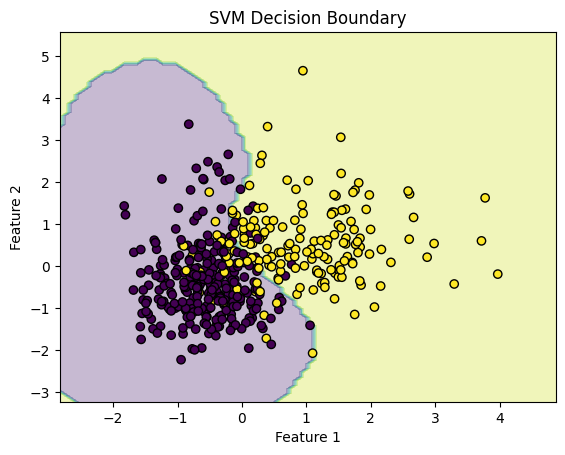

In [14]:
import numpy as np
import matplotlib.pyplot as plt
feature_1 = 0 
feature_2 = 1 
X_vis = X_train[:, [feature_1, feature_2]]
y_vis = y_train
svm_vis = SVC(kernel="rbf", C=grid_search.best_params_["C"], gamma=grid_search.best_params_["gamma"])
svm_vis.fit(X_vis, y_vis)
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = svm_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, edgecolors="k", marker="o")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("SVM Decision Boundary")
plt.show()


In [15]:
import numpy as np
feature_importance = np.abs(svm_linear.coef_).flatten()
feature_df = pd.DataFrame({"Feature": df.drop(columns=["id", "diagnosis"]).columns, "Importance": feature_importance})
feature_df = feature_df.sort_values(by="Importance", ascending=False)
print(feature_df)


                    Feature  Importance
7       concave points_mean    1.418988
21            texture_worst    1.216625
10                radius_se    0.990636
28           symmetry_worst    0.791900
13                  area_se    0.782762
5          compactness_mean    0.748394
26          concavity_worst    0.739317
6            concavity_mean    0.677843
20             radius_worst    0.596123
19     fractal_dimension_se    0.591203
23               area_worst    0.551364
29  fractal_dimension_worst    0.533527
18              symmetry_se    0.401042
11               texture_se    0.382790
0               radius_mean    0.348340
15           compactness_se    0.347780
14            smoothness_se    0.335482
2            perimeter_mean    0.274030
16             concavity_se    0.230995
3                 area_mean    0.225575
24         smoothness_worst    0.217771
12             perimeter_se    0.188129
17        concave points_se    0.176028
25        compactness_worst    0.161653


In [16]:
misclassified = X_test[y_test != y_pred_final]
print(pd.DataFrame(misclassified).head())


         0         1         2         3         4         5         6   \
0 -0.092956 -0.814392 -0.063393 -0.201331  0.308838  0.448373 -0.136966   
1 -0.288925  0.756379 -0.203852 -0.356904  0.273255  0.833088 -0.021963   
2 -0.047513 -0.521181 -0.022203 -0.149284  0.942210  0.446478  0.114133   

         7         8         9   ...        20        21        22        23  \
0  0.045677 -0.546249  0.405774  ...  0.062293 -0.784455  0.090513 -0.119860   
1  0.054189  0.140128  1.460471  ... -0.356014  0.567149 -0.231770 -0.424155   
2  0.091333  0.351883 -0.212302  ...  0.025018 -0.587414  0.024984 -0.095952   

         24        25        26        27        28        29  
0  0.382749  0.635726  0.027401  0.360776 -0.504352  1.055903  
1  0.110966  1.182806  0.211146 -0.030548  1.985412  1.310816  
2  0.825491  0.457607  0.233695  0.347072  0.270565 -0.242489  

[3 rows x 30 columns]


In [17]:
svm_poly = SVC(kernel="poly", degree=3, C=grid_search.best_params_["C"], random_state=42)
svm_poly.fit(X_train, y_train)
y_pred_poly = svm_poly.predict(X_test)
accuracy_poly = accuracy_score(y_test, y_pred_poly)
print(f"Polynomial Kernel SVM Accuracy: {accuracy_poly:.2f}")


Polynomial Kernel SVM Accuracy: 0.87


In [18]:
models = {
    "Linear": svm_linear,
    "RBF": svm_rbf,
    "Polynomial": svm_poly
}
for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Kernel Accuracy: {acc:.2f}")


Linear Kernel Accuracy: 0.96
RBF Kernel Accuracy: 0.97
Polynomial Kernel Accuracy: 0.87
